## Data Preparation

In [1]:
import pandas as pd
all_data=[]
for i in range(1,16):
    if i==1:
        data=pd.read_csv('data/%d.csv'%i,names=['seq_num','x_acc','y_acc','z_acc','label'])

        j=1
        
        while j<len(data)//52:
            
            _,x_acc_mean,y_acc_mean,z_acc_mean,label=data[(j-1)*52:(j)*52].mean()
            _,x_acc_std,y_acc_std,z_acc_std,label=data[(j-1)*52:(j)*52].std()
            _,x_acc_min,y_acc_min,z_acc_min,label=data[(j-1)*52:(j)*52].min()
            _,x_acc_max,y_acc_max,z_acc_max,label=data[(j-1)*52:(j)*52].max()
            all_data.append([x_acc_mean, y_acc_mean, z_acc_mean,x_acc_std,y_acc_std,z_acc_std,x_acc_min,y_acc_min,z_acc_min,x_acc_max,y_acc_max,z_acc_max,label])
            j+=1
        
    else:
        temp=pd.read_csv('data/%d.csv'%i,names=['seq_num','x_acc','y_acc','z_acc','label'])

        j=1
        while j<len(temp)//52:
            
            _,x_acc_mean,y_acc_mean,z_acc_mean,label=temp[(j-1)*52:(j)*52].mean()
            _,x_acc_std,y_acc_std,z_acc_std,label=temp[(j-1)*52:(j)*52].std()
            _,x_acc_min,y_acc_min,z_acc_min,label=temp[(j-1)*52:(j)*52].min()
            _,x_acc_max,y_acc_max,z_acc_max,label=temp[(j-1)*52:(j)*52].max()
            all_data.append([x_acc_mean, y_acc_mean, z_acc_mean,x_acc_std,y_acc_std,z_acc_std,x_acc_min,y_acc_min,z_acc_min,x_acc_max,y_acc_max,z_acc_max,label])
            j+=1
        data=data.append(temp,ignore_index=True)


In [2]:
data.isna().sum()

seq_num    0
x_acc      0
y_acc      0
z_acc      0
label      0
dtype: int64

In [3]:
data.describe()

,seq_num,x_acc,y_acc,z_acc,label
count,1.926896e+06,1.926896e+06,1.926896e+06,1.926896e+06,1.926896e+06
mean,6.711283e+04,1.987652e+03,2.382523e+03,1.970596e+03,3.882898e+00
std,4.146191e+04,1.113578e+02,1.003151e+02,9.445893e+01,2.443402e+00
min,0.000000e+00,2.820000e+02,2.000000e+00,1.000000e+00,0.000000e+00
25%,3.211400e+04,1.904000e+03,2.337000e+03,1.918000e+03,1.000000e+00
50%,6.422900e+04,1.992000e+03,2.367000e+03,1.988000e+03,4.000000e+00
75%,9.839400e+04,2.076000e+03,2.413000e+03,2.032000e+03,7.000000e+00
max,1.667400e+05,3.828000e+03,4.095000e+03,4.095000e+03,7.000000e+00


In [4]:
final_dateframe= pd.DataFrame(all_data,columns=["x_acc_mean", "y_acc_mean", "z_acc_mean",'x_acc_std','y_acc_std','z_acc_std','x_acc_min','y_acc_min','z_acc_min','x_acc_max','y_acc_max','z_acc_max','label'])


In [5]:
final_dateframe['label'].unique()

array([1., 2., 3., 4., 5., 6., 7., 0.])

## Data Exploration

In [6]:
import numpy as np
import matplotlib.pyplot as plt
figure, axes = plt.subplots(nrows=3, ncols=1)
axes[0].plot(np.array(data['seq_num']),np.array(data['x_acc']))
axes[1].plot(np.array(data['seq_num']),np.array(data['y_acc']))
axes[2].plot(np.array(data['seq_num']),np.array(data['z_acc']))
axes[0].set_xlabel('Sequence Number')
axes[0].set_ylabel('Acceleration')
axes[1].set_xlabel('Sequence Number')
axes[1].set_ylabel('Acceleration')
axes[2].set_xlabel('Sequence Number')
axes[2].set_ylabel('Acceleration')
axes[0].title.set_text('x axis acceleration')
axes[1].title.set_text('y axis acceleration')
axes[2].title.set_text('z axis acceleration')
figure.set_size_inches(15,20)
figure.suptitle('The Acceleration vs Sequence Number for the data', fontsize=16)
figure.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


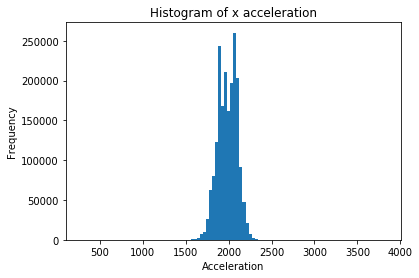

In [7]:
data['x_acc'].plot(kind='hist',bins=100)
plt.title('Histogram of x acceleration')
plt.xlabel('Acceleration')
plt.show()

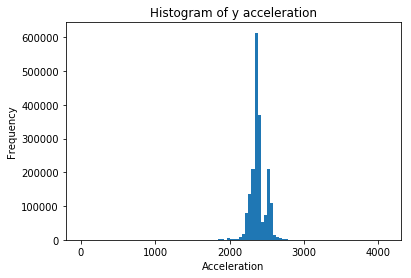

In [8]:
data['y_acc'].plot(kind='hist',bins=100)
plt.title('Histogram of y acceleration')
plt.xlabel('Acceleration')
plt.show()

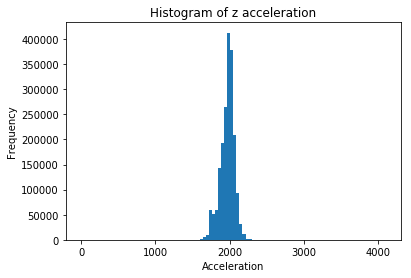

In [9]:
data['z_acc'].plot(kind='hist',bins=100)
plt.title('Histogram of z acceleration')
plt.xlabel('Acceleration')
plt.show()

In [10]:
# checking for relationships between different column
data.corr()

,seq_num,x_acc,y_acc,z_acc,label
seq_num,1.000000,0.061897,0.033340,0.018942,0.897134
x_acc,0.061897,1.000000,0.364761,0.010835,0.074987
y_acc,0.033340,0.364761,1.000000,0.346573,0.044971
z_acc,0.018942,0.010835,0.346573,1.000000,0.033105
label,0.897134,0.074987,0.044971,0.033105,1.000000


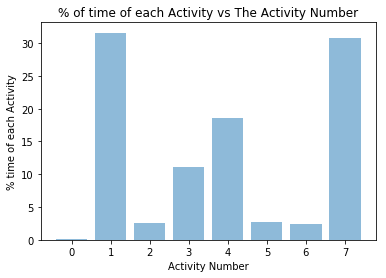

In [11]:
freq={}
for i in range(8):
    freq[i]=len(final_dateframe[final_dateframe['label']==i])
percent_list=[]
for i in range(8):
    percent_list.append(freq[i]*100/(len(final_dateframe)))
import matplotlib.pyplot as plt

%matplotlib inline

plt.xticks(list(range(8)))
plt.bar(list(range(8)),percent_list , align='center', alpha=0.5)
plt.ylabel('% time of each Activity')
plt.xlabel('Activity Number')
plt.title('% of time of each Activity vs The Activity Number')

plt.show()

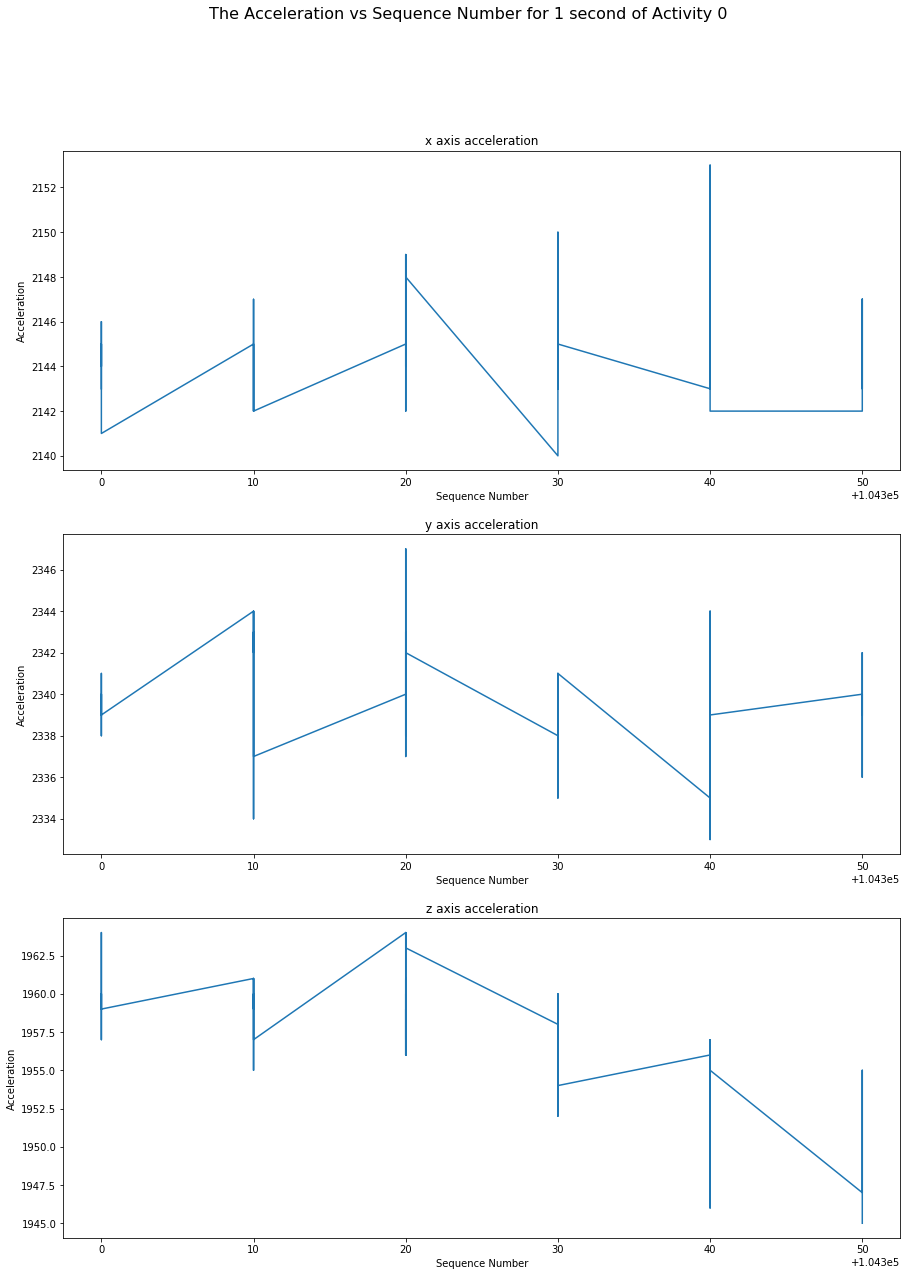

In [12]:


figure, axes = plt.subplots(nrows=3, ncols=1)
axes[0].plot(np.array(data[data['label']==0]['seq_num'])[1:53],np.array(data[data['label']==0]['x_acc'][1:53]))
axes[1].plot(np.array(data[data['label']==0]['seq_num'])[1:53],np.array(data[data['label']==0]['y_acc'][1:53]))
axes[2].plot(np.array(data[data['label']==0]['seq_num'])[1:53],np.array(data[data['label']==0]['z_acc'][1:53]))
axes[0].title.set_text('x axis acceleration')
axes[1].title.set_text('y axis acceleration')
axes[2].title.set_text('z axis acceleration')
axes[0].set_xlabel('Sequence Number')
axes[0].set_ylabel('Acceleration')
axes[1].set_xlabel('Sequence Number')
axes[1].set_ylabel('Acceleration')
axes[2].set_xlabel('Sequence Number')
axes[2].set_ylabel('Acceleration')
figure.set_size_inches(15,20)
figure.suptitle('The Acceleration vs Sequence Number for 1 second of Activity 0', fontsize=16)
figure.show()

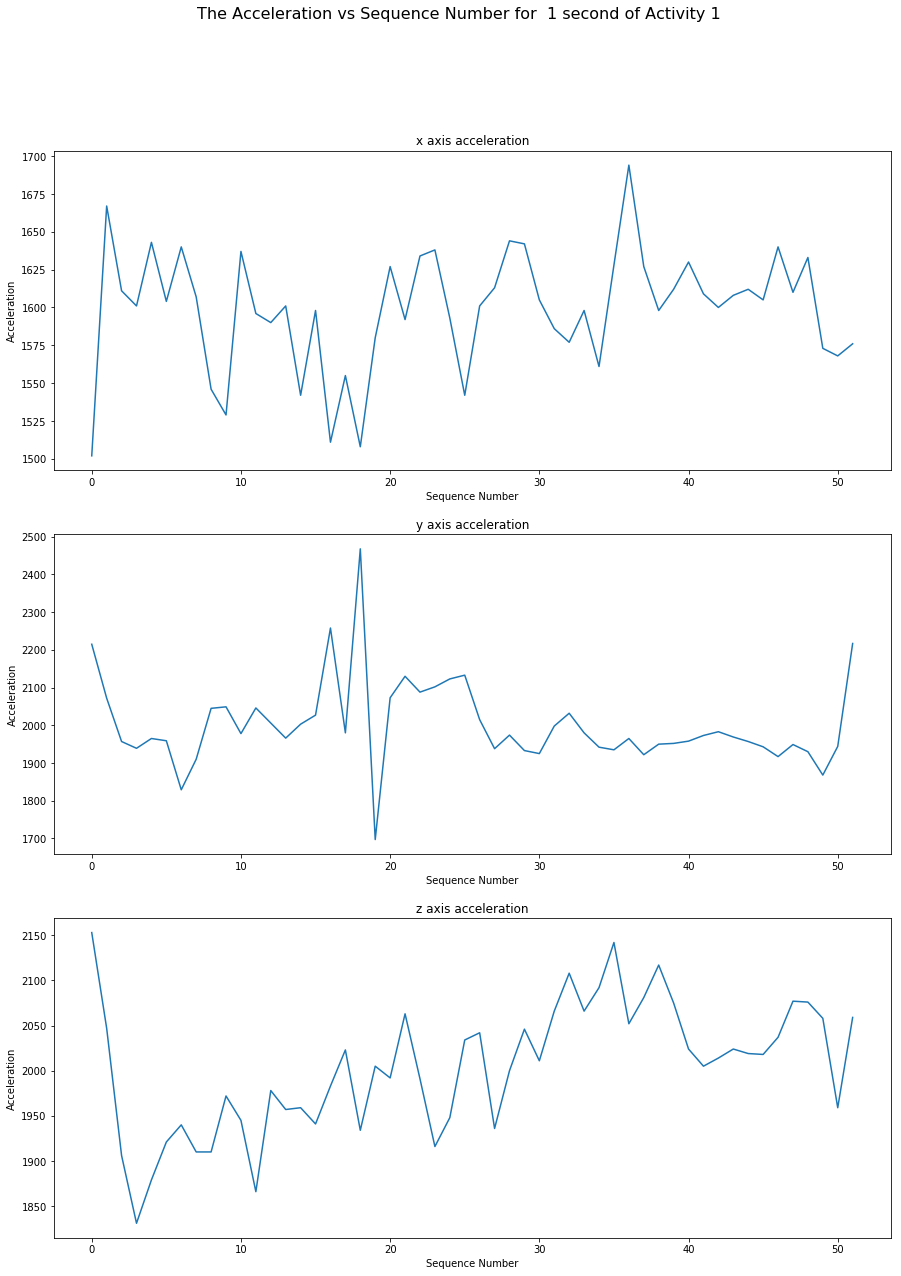

In [13]:


figure, axes = plt.subplots(nrows=3, ncols=1)
axes[0].plot(np.array(data[data['label']==1]['seq_num'])[0:52],np.array(data[data['label']==1]['x_acc'][0:52]))
axes[1].plot(np.array(data[data['label']==1]['seq_num'])[0:52],np.array(data[data['label']==1]['y_acc'][0:52]))
axes[2].plot(np.array(data[data['label']==1]['seq_num'])[0:52],np.array(data[data['label']==1]['z_acc'][0:52]))
axes[0].title.set_text('x axis acceleration')
axes[1].title.set_text('y axis acceleration')
axes[2].title.set_text('z axis acceleration')
axes[0].set_xlabel('Sequence Number')
axes[0].set_ylabel('Acceleration')
axes[1].set_xlabel('Sequence Number')
axes[1].set_ylabel('Acceleration')
axes[2].set_xlabel('Sequence Number')
axes[2].set_ylabel('Acceleration')
figure.set_size_inches(15,20)
figure.suptitle('The Acceleration vs Sequence Number for  1 second of Activity 1', fontsize=16)
figure.show()

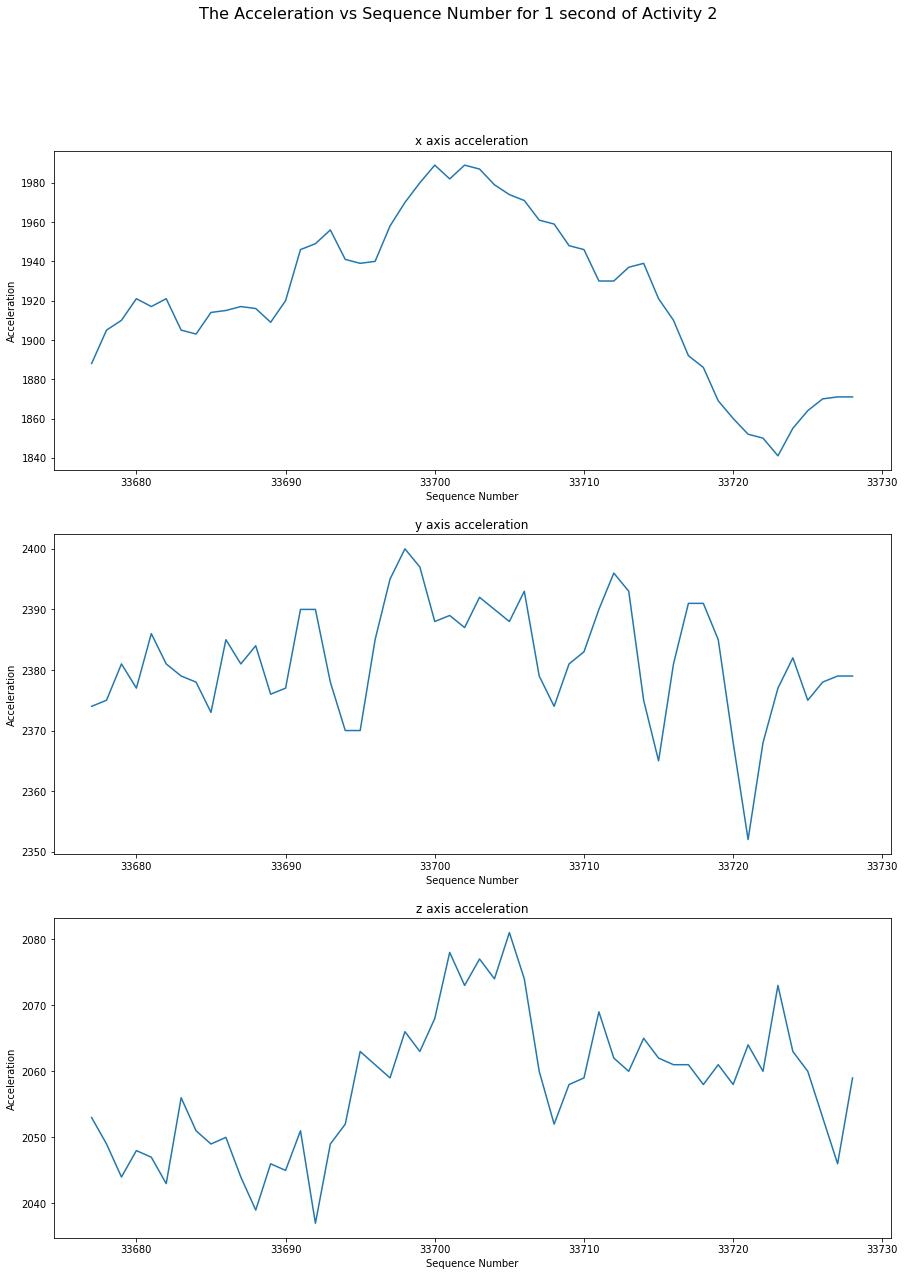

In [14]:


figure, axes = plt.subplots(nrows=3, ncols=1)
axes[0].plot(np.array(data[data['label']==2]['seq_num'])[0:52],np.array(data[data['label']==2]['x_acc'][0:52]))
axes[1].plot(np.array(data[data['label']==2]['seq_num'])[0:52],np.array(data[data['label']==2]['y_acc'][0:52]))
axes[2].plot(np.array(data[data['label']==2]['seq_num'])[0:52],np.array(data[data['label']==2]['z_acc'][0:52]))
axes[0].title.set_text('x axis acceleration')
axes[1].title.set_text('y axis acceleration')
axes[2].title.set_text('z axis acceleration')
axes[0].set_xlabel('Sequence Number')
axes[0].set_ylabel('Acceleration')
axes[1].set_xlabel('Sequence Number')
axes[1].set_ylabel('Acceleration')
axes[2].set_xlabel('Sequence Number')
axes[2].set_ylabel('Acceleration')
figure.set_size_inches(15,20)
figure.suptitle('The Acceleration vs Sequence Number for 1 second of Activity 2', fontsize=16)
figure.show()

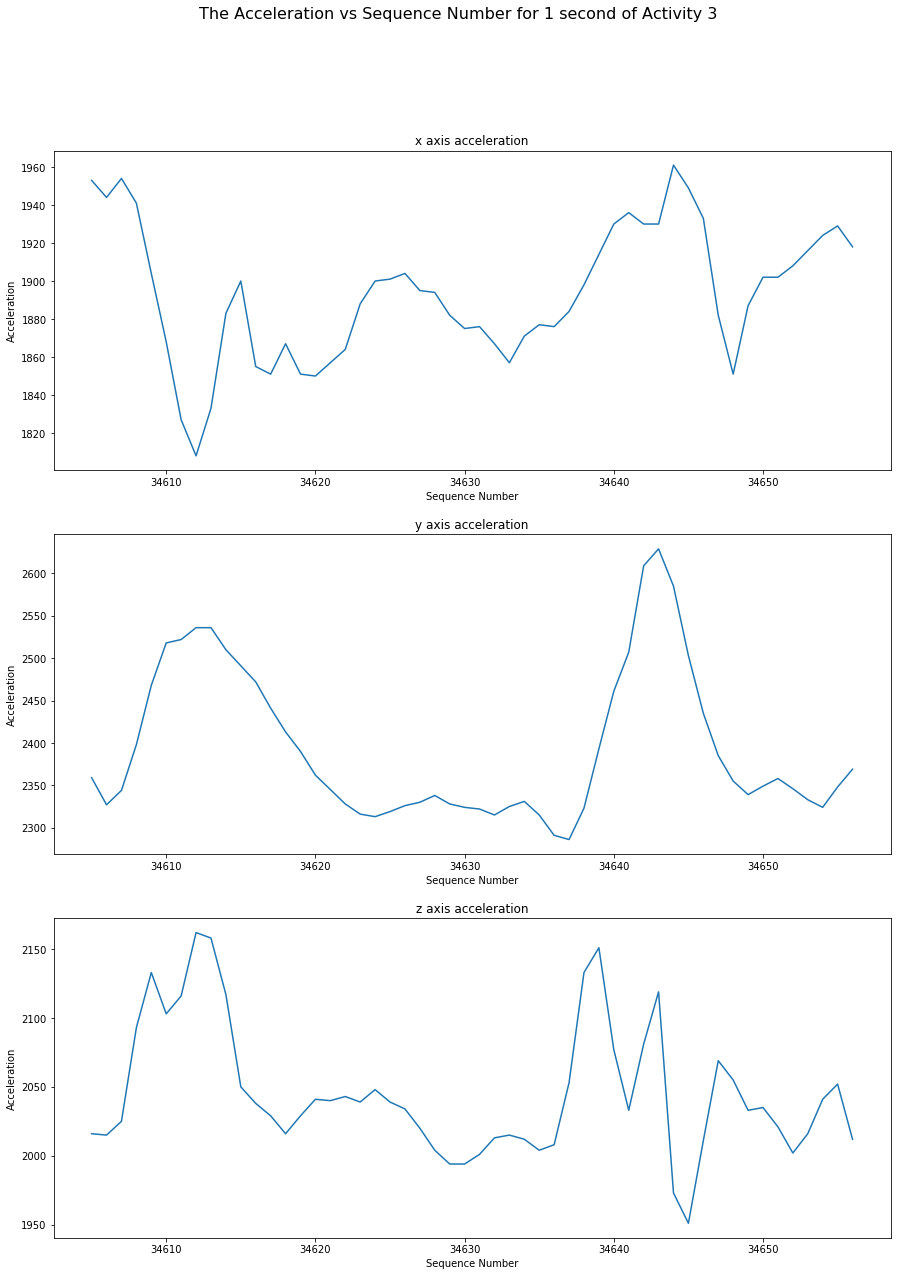

In [15]:


figure, axes = plt.subplots(nrows=3, ncols=1)
axes[0].plot(np.array(data[data['label']==3]['seq_num'])[0:52],np.array(data[data['label']==3]['x_acc'][0:52]))
axes[1].plot(np.array(data[data['label']==3]['seq_num'])[0:52],np.array(data[data['label']==3]['y_acc'][0:52]))
axes[2].plot(np.array(data[data['label']==3]['seq_num'])[0:52],np.array(data[data['label']==3]['z_acc'][0:52]))
axes[0].title.set_text('x axis acceleration')
axes[1].title.set_text('y axis acceleration')
axes[2].title.set_text('z axis acceleration')
axes[0].set_xlabel('Sequence Number')
axes[0].set_ylabel('Acceleration')
axes[1].set_xlabel('Sequence Number')
axes[1].set_ylabel('Acceleration')
axes[2].set_xlabel('Sequence Number')
axes[2].set_ylabel('Acceleration')
figure.set_size_inches(15,20)
figure.suptitle('The Acceleration vs Sequence Number for 1 second of Activity 3', fontsize=16)
figure.show()

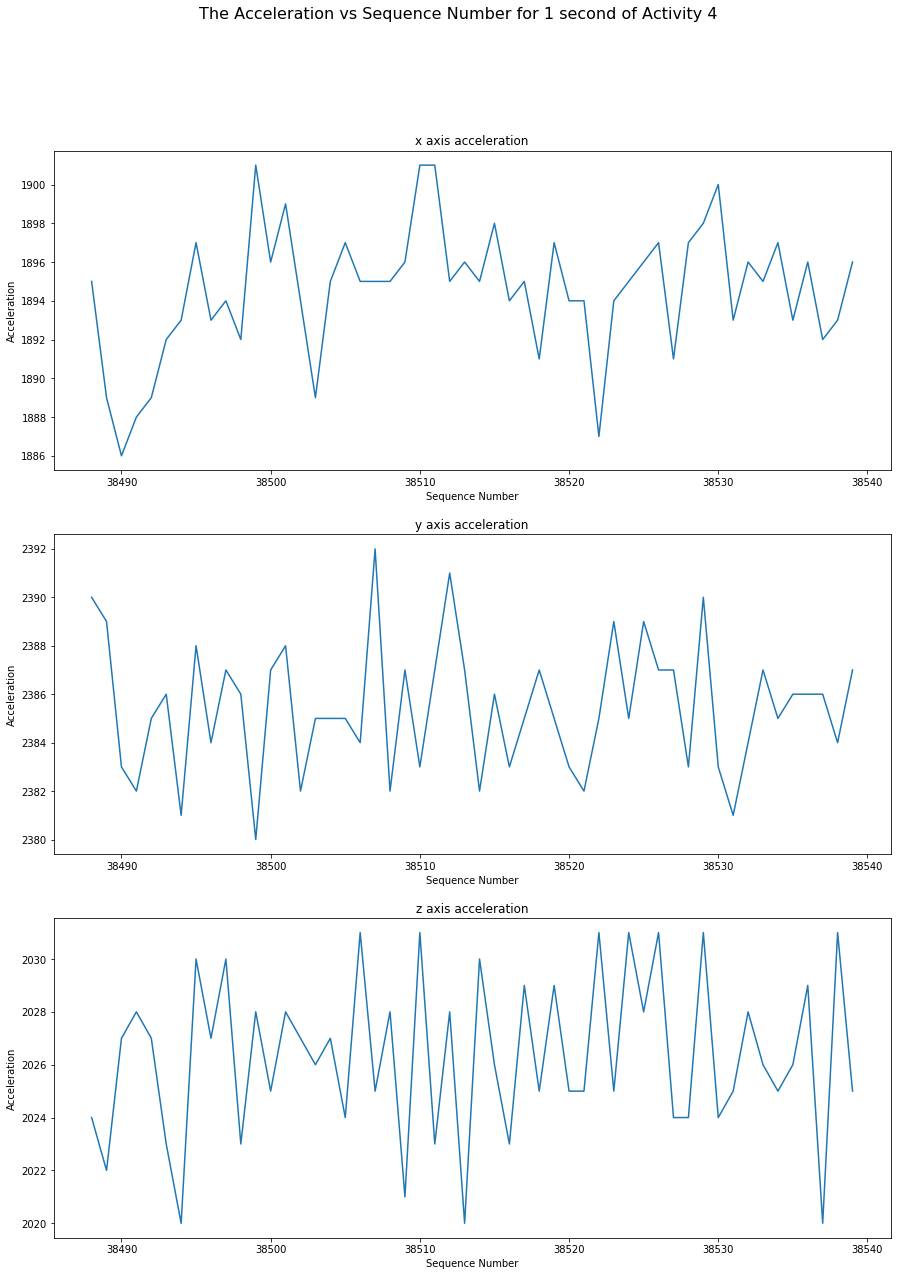

In [16]:


figure, axes = plt.subplots(nrows=3, ncols=1)
axes[0].plot(np.array(data[data['label']==4]['seq_num'])[0:52],np.array(data[data['label']==4]['x_acc'][0:52]))
axes[1].plot(np.array(data[data['label']==4]['seq_num'])[0:52],np.array(data[data['label']==4]['y_acc'][0:52]))
axes[2].plot(np.array(data[data['label']==4]['seq_num'])[0:52],np.array(data[data['label']==4]['z_acc'][0:52]))
axes[0].title.set_text('x axis acceleration')
axes[1].title.set_text('y axis acceleration')
axes[2].title.set_text('z axis acceleration')
axes[0].set_xlabel('Sequence Number')
axes[0].set_ylabel('Acceleration')
axes[1].set_xlabel('Sequence Number')
axes[1].set_ylabel('Acceleration')
axes[2].set_xlabel('Sequence Number')
axes[2].set_ylabel('Acceleration')
figure.set_size_inches(15,20)
figure.suptitle('The Acceleration vs Sequence Number for 1 second of Activity 4', fontsize=16)
figure.show()

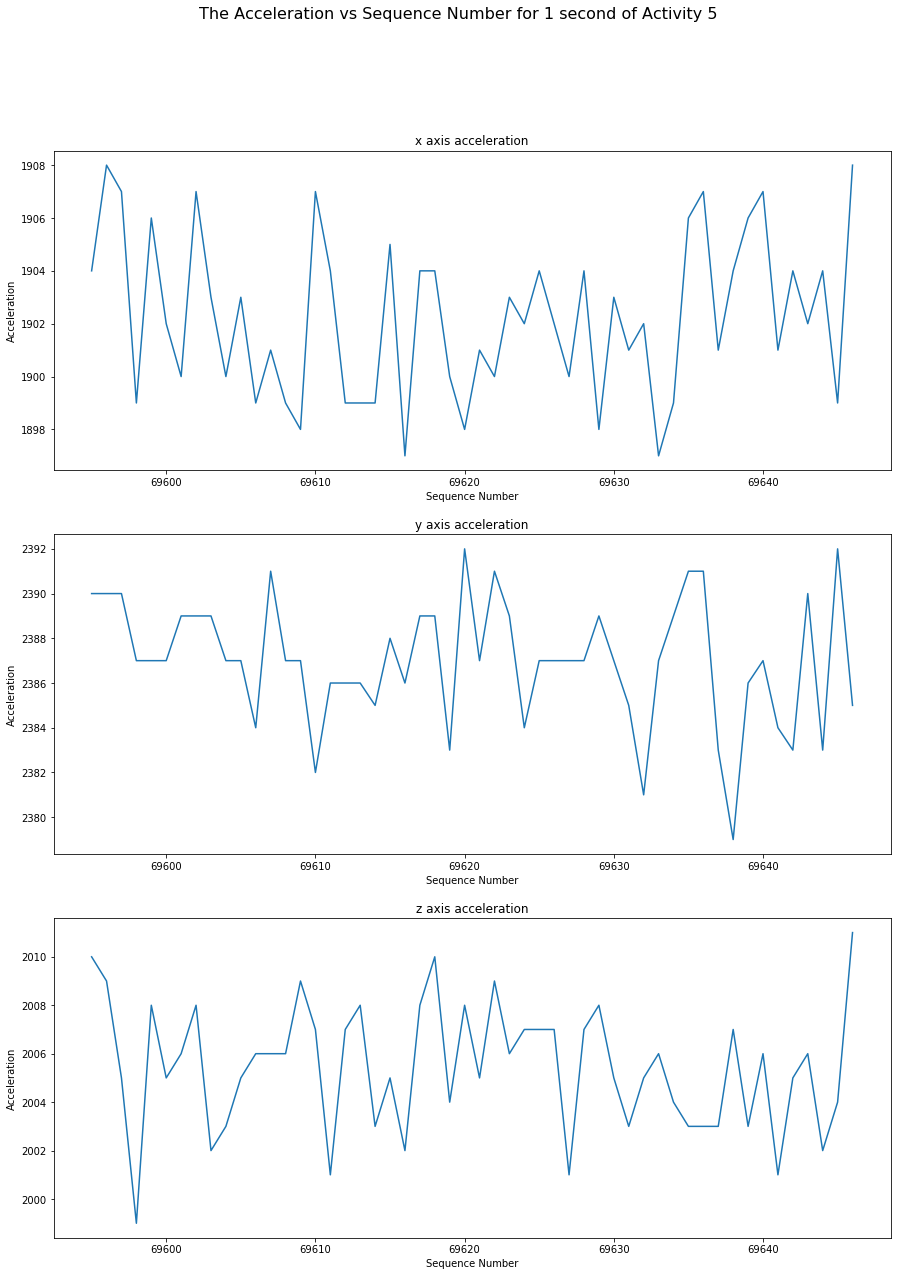

In [17]:


figure, axes = plt.subplots(nrows=3, ncols=1)
axes[0].plot(np.array(data[data['label']==5]['seq_num'])[0:52],np.array(data[data['label']==5]['x_acc'][0:52]))
axes[1].plot(np.array(data[data['label']==5]['seq_num'])[0:52],np.array(data[data['label']==5]['y_acc'][0:52]))
axes[2].plot(np.array(data[data['label']==5]['seq_num'])[0:52],np.array(data[data['label']==5]['z_acc'][0:52]))
axes[0].title.set_text('x axis acceleration')
axes[1].title.set_text('y axis acceleration')
axes[2].title.set_text('z axis acceleration')
axes[0].set_xlabel('Sequence Number')
axes[0].set_ylabel('Acceleration')
axes[1].set_xlabel('Sequence Number')
axes[1].set_ylabel('Acceleration')
axes[2].set_xlabel('Sequence Number')
axes[2].set_ylabel('Acceleration')
figure.set_size_inches(15,20)
figure.suptitle('The Acceleration vs Sequence Number for 1 second of Activity 5', fontsize=16)
figure.show()

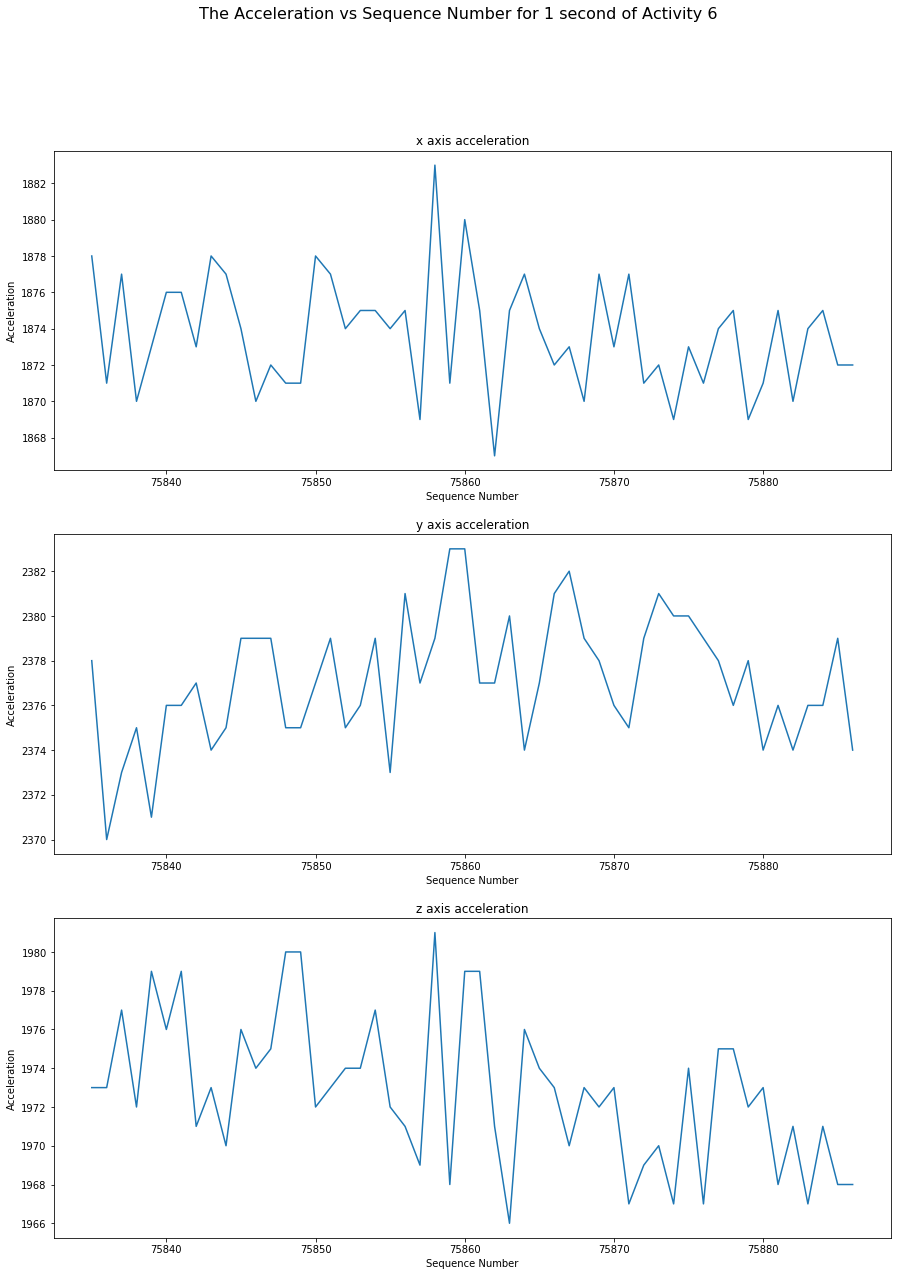

In [18]:


figure, axes = plt.subplots(nrows=3, ncols=1)
axes[0].plot(np.array(data[data['label']==6]['seq_num'])[0:52],np.array(data[data['label']==6]['x_acc'][0:52]))
axes[1].plot(np.array(data[data['label']==6]['seq_num'])[0:52],np.array(data[data['label']==6]['y_acc'][0:52]))
axes[2].plot(np.array(data[data['label']==6]['seq_num'])[0:52],np.array(data[data['label']==6]['z_acc'][0:52]))
axes[0].title.set_text('x axis acceleration')
axes[1].title.set_text('y axis acceleration')
axes[2].title.set_text('z axis acceleration')
axes[0].set_xlabel('Sequence Number')
axes[0].set_ylabel('Acceleration')
axes[1].set_xlabel('Sequence Number')
axes[1].set_ylabel('Acceleration')
axes[2].set_xlabel('Sequence Number')
axes[2].set_ylabel('Acceleration')
figure.set_size_inches(15,20)
figure.suptitle('The Acceleration vs Sequence Number for 1 second of Activity 6', fontsize=16)
figure.show()

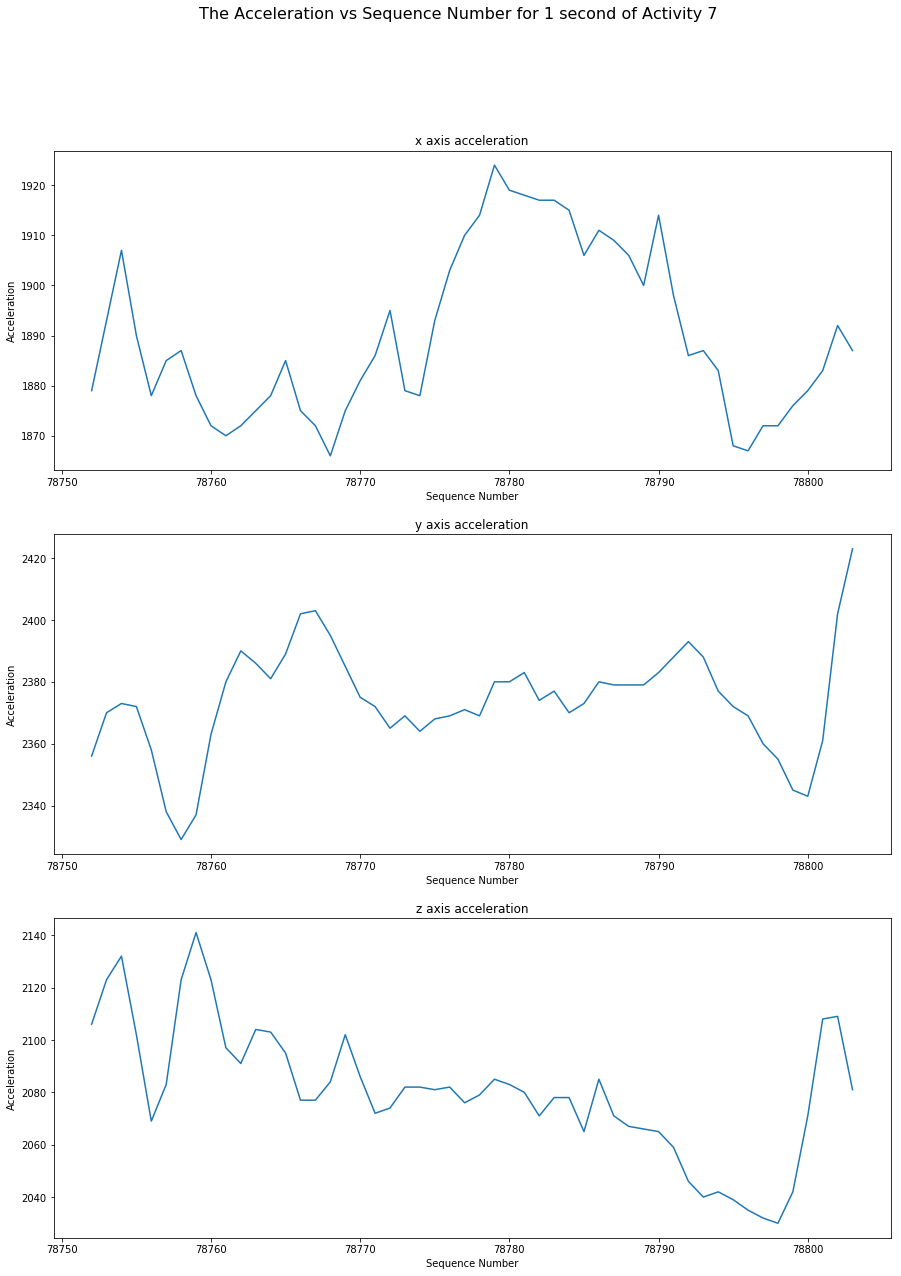

In [19]:


figure, axes = plt.subplots(nrows=3, ncols=1)
axes[0].plot(np.array(data[data['label']==7]['seq_num'])[0:52],np.array(data[data['label']==7]['x_acc'][0:52]))
axes[1].plot(np.array(data[data['label']==7]['seq_num'])[0:52],np.array(data[data['label']==7]['y_acc'][0:52]))
axes[2].plot(np.array(data[data['label']==7]['seq_num'])[0:52],np.array(data[data['label']==7]['z_acc'][0:52]))
axes[0].title.set_text('x axis acceleration')
axes[1].title.set_text('y axis acceleration')
axes[2].title.set_text('z axis acceleration')
axes[0].set_xlabel('Sequence Number')
axes[0].set_ylabel('Acceleration')
axes[1].set_xlabel('Sequence Number')
axes[1].set_ylabel('Acceleration')
axes[2].set_xlabel('Sequence Number')
axes[2].set_ylabel('Acceleration')
figure.set_size_inches(15,20)
figure.suptitle('The Acceleration vs Sequence Number for 1 second of Activity 7', fontsize=16)
figure.show()

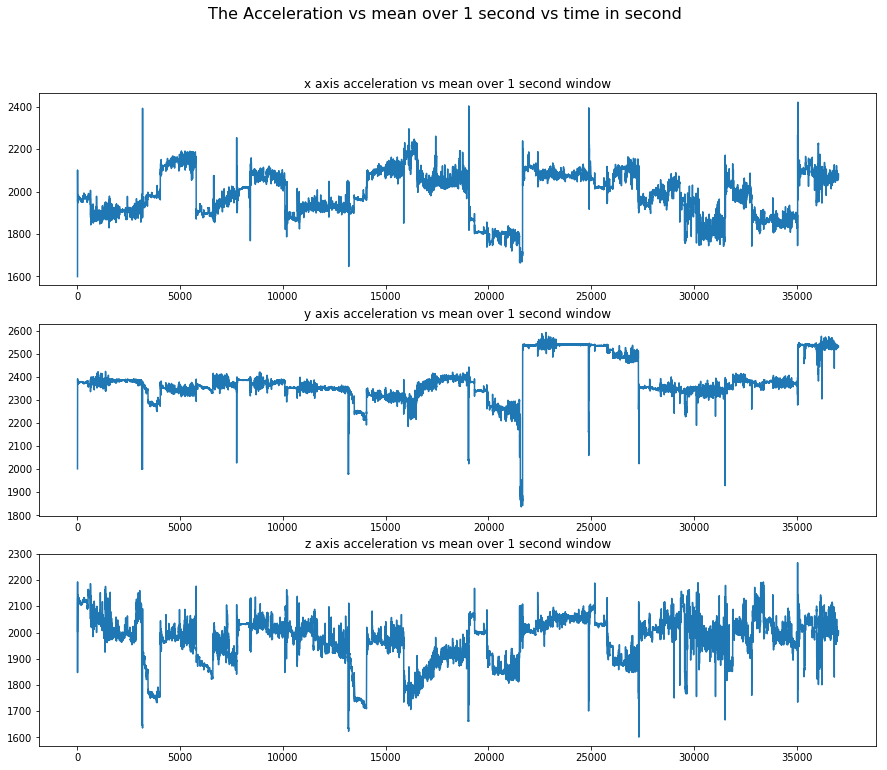

In [20]:
import numpy as np
import matplotlib.pyplot as plt
figure, axes = plt.subplots(nrows=3, ncols=1)
axes[0].plot(range(len(final_dateframe)),np.array(final_dateframe['x_acc_mean']))
axes[1].plot(range(len(final_dateframe)),np.array(final_dateframe['y_acc_mean']))
axes[2].plot(range(len(final_dateframe)),np.array(final_dateframe['z_acc_mean']))
axes[0].title.set_text('x axis acceleration vs mean over 1 second window')
axes[1].title.set_text('y axis acceleration vs mean over 1 second window')
axes[2].title.set_text('z axis acceleration vs mean over 1 second window')
figure.set_size_inches(15,12)
figure.suptitle('The Acceleration vs mean over 1 second vs time in second', fontsize=16)
figure.show()

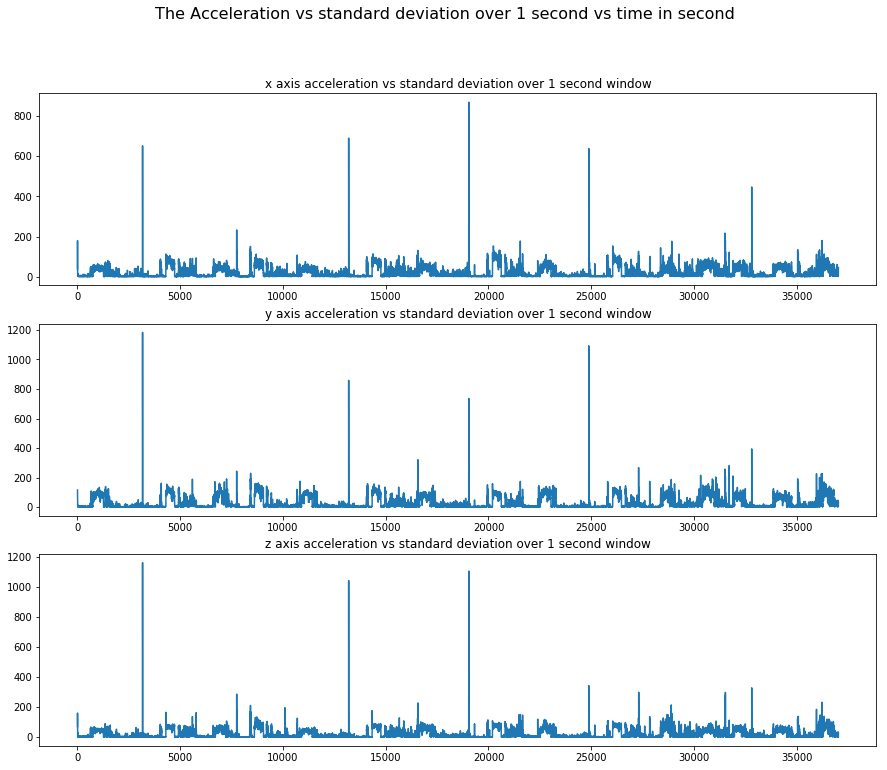

In [21]:
import numpy as np
import matplotlib.pyplot as plt
figure, axes = plt.subplots(nrows=3, ncols=1)
axes[0].plot(range(len(final_dateframe)),np.array(final_dateframe['x_acc_std']))
axes[1].plot(range(len(final_dateframe)),np.array(final_dateframe['y_acc_std']))
axes[2].plot(range(len(final_dateframe)),np.array(final_dateframe['z_acc_std']))
axes[0].title.set_text('x axis acceleration vs standard deviation over 1 second window')
axes[1].title.set_text('y axis acceleration vs standard deviation over 1 second window')
axes[2].title.set_text('z axis acceleration vs standard deviation over 1 second window')
figure.set_size_inches(15,12)
figure.suptitle('The Acceleration vs standard deviation over 1 second vs time in second', fontsize=16)
figure.show()

## Data Modeling

In [22]:

X=final_dateframe.drop(['label'],axis=1)
y=final_dateframe['label']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

Accuracy score of prediction for classifiaction using DecisionTreeClassifier is 0.8112596192790603


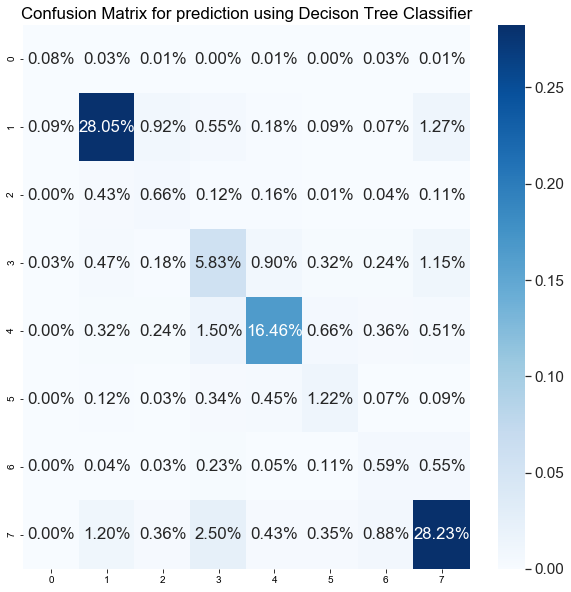

In [24]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(max_depth=15, min_samples_split=5,random_state=0)
classifier.fit(X_train,y_train)
from sklearn.metrics import accuracy_score

print('Accuracy score of prediction for classifiaction using DecisionTreeClassifier is',accuracy_score(classifier.predict(X_test),y_test))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(classifier.predict(X_test),y_test)
import seaborn as sn
fig, ax = plt.subplots(figsize=(10,10)) 
sn.set(font_scale=1.4)
sn.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues',ax=ax)
plt.title('Confusion Matrix for prediction using Decison Tree Classifier')
plt.show()



Accuracy score of prediction for classifiaction using KNeighborsClassifier is 0.8452814904819765


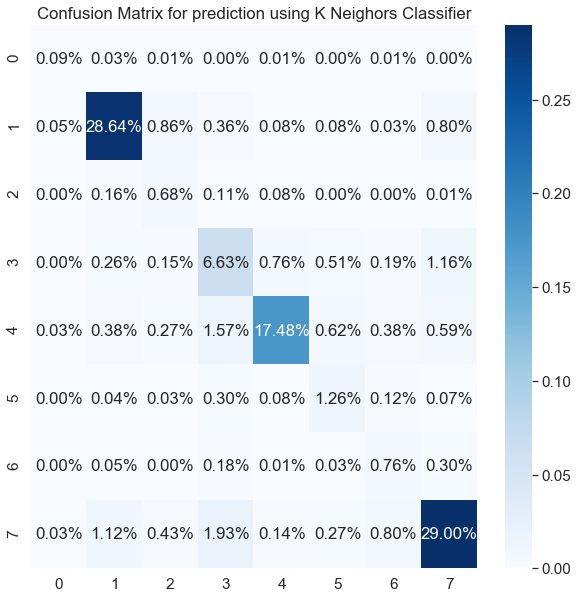

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(10)
classifier.fit(X_train,y_train)
from sklearn.metrics import accuracy_score

print('Accuracy score of prediction for classifiaction using KNeighborsClassifier is',accuracy_score(classifier.predict(X_test),y_test))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(classifier.predict(X_test),y_test)
import seaborn as sn
fig, ax = plt.subplots(figsize=(10,10)) 
sn.set(font_scale=1.4)

sn.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues',ax=ax)
plt.title('Confusion Matrix for prediction using K Neighors Classifier')
plt.show()
